In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## 1. Génération du Dataset

In [117]:
# Génération d'un dataset de classification (make_moons pour une forme non linéaire)
X, y = datasets.make_moons(n_samples=500, noise=0.15, random_state=42)

print(f"Forme du dataset: {X.shape}")
print(f"Nombre de classes: {len(np.unique(y))}")
print(f"Distribution des classes: {np.bincount(y)}")

Forme du dataset: (500, 2)
Nombre de classes: 2
Distribution des classes: [250 250]


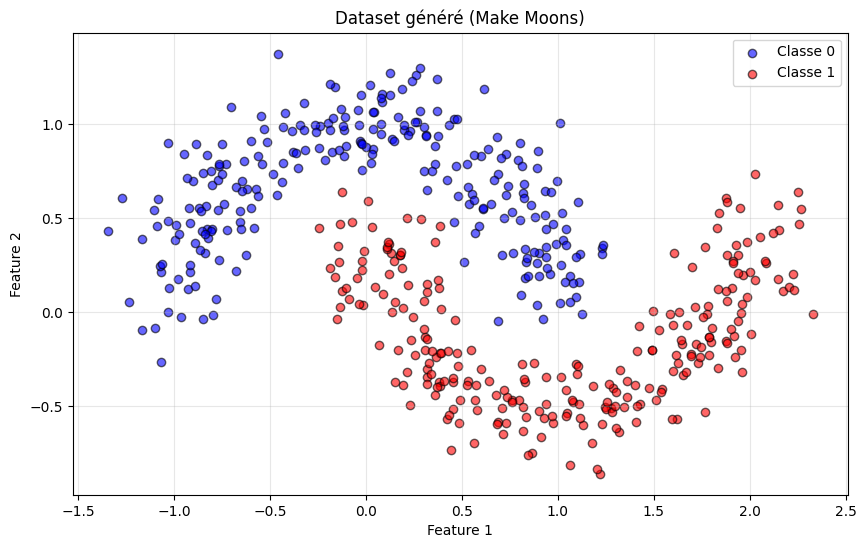

In [118]:
# Visualisation du dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Classe 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Classe 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset généré (Make Moons)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Préparation des données

In [119]:
# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")

Taille de l'ensemble d'entraînement: (350, 2)
Taille de l'ensemble de test: (150, 2)


## 3. Entraînement du modèle SVC

In [120]:
# Création et entraînement du modèle SVC avec un noyau RBF
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

print("Modèle SVC entraîné avec succès!")
print(f"Nombre de vecteurs de support: {len(svc_model.support_vectors_)}")

Modèle SVC entraîné avec succès!
Nombre de vecteurs de support: 64


## 4. Prédictions et Évaluation

In [121]:
# Prédictions sur l'ensemble de test
y_pred = svc_model.predict(X_test_scaled)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur l'ensemble de test: {accuracy:.4f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

Précision sur l'ensemble de test: 0.9800

Rapport de classification:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



## 5. Visualisation des résultats

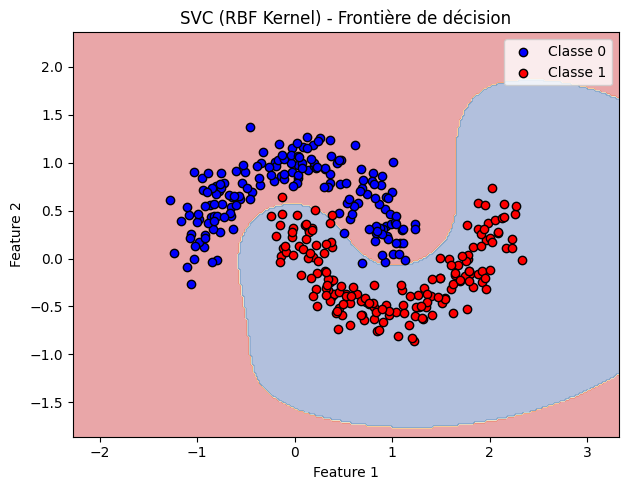

In [122]:
# Fonction pour tracer la frontière de décision
def plot_decision_boundary(X, y, model, scaler, title):
    # Créer un maillage
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Prédire pour chaque point du maillage
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Tracer
    plt.figure(figsize=(12, 5))
    
    # Frontière de décision
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Classe 0', edgecolors='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Classe 1', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{title} - Frontière de décision')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Visualiser la frontière de décision
plot_decision_boundary(X_train, y_train, svc_model, scaler, 'SVC (RBF Kernel)')

/tmp/ipykernel_180633/2521672545.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  axes[0].contour(xx_train, yy_train, Z_train, levels=[-1], linewidths=3,
/tmp/ipykernel_180633/2521672545.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  axes[0].contour(xx_train, yy_train, Z_train, levels=[0], linewidths=4,
/tmp/ipykernel_180633/2521672545.py:23: UserWarning: The following kwargs were not used by contour: 'label'
  axes[0].contour(xx_train, yy_train, Z_train, levels=[1], linewidths=3,
/tmp/ipykernel_180633/2521672545.py:53: UserWarning: The following kwargs were not used by contour: 'label'
  axes[1].contour(xx_test, yy_test, Z_test, levels=[-1], linewidths=3,
/tmp/ipykernel_180633/2521672545.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  axes[1].contour(xx_test, yy_test, Z_test, levels=[0], linewidths=4,
/tmp/ipykernel_180633/2521672545.py:57: UserWarning: The following kwargs were not used by contour:

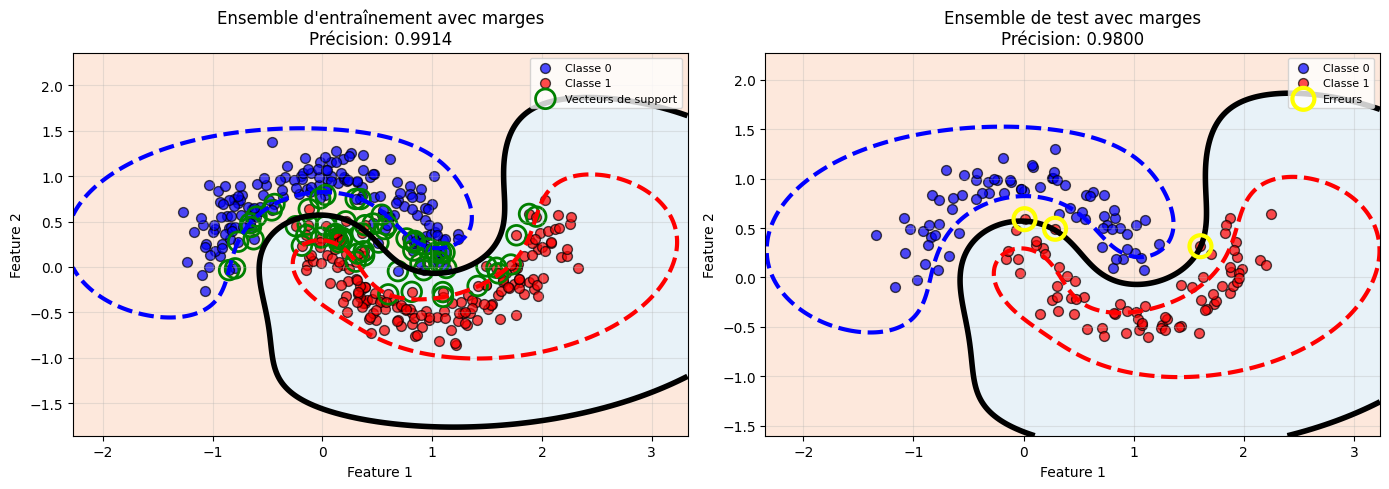


Résumé des performances:
Précision sur l'entraînement: 0.9914
Précision sur le test: 0.9800
Nombre d'erreurs sur le test: 3 / 150
Nombre de vecteurs de support: 64

Légende des marges:
  • Ligne bleue pointillée: marge négative (distance = -1)
  • Ligne noire continue: frontière de décision (distance = 0)
  • Ligne rouge pointillée: marge positive (distance = +1)
  • Points verts: vecteurs de support (définissent les marges)


In [123]:
# Comparaison des résultats sur train vs test avec marges
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prédictions sur l'ensemble d'entraînement
y_train_pred = svc_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Créer un maillage pour la fonction de décision - ensemble d'entraînement
h = 0.02
x_min_train, x_max_train = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_train, y_max_train = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx_train, yy_train = np.meshgrid(np.arange(x_min_train, x_max_train, h), 
                                   np.arange(y_min_train, y_max_train, h))
Z_train = svc_model.decision_function(scaler.transform(np.c_[xx_train.ravel(), yy_train.ravel()]))
Z_train = Z_train.reshape(xx_train.shape)

# Plot ensemble d'entraînement avec marges
axes[0].contourf(xx_train, yy_train, Z_train > 0, alpha=0.2, cmap='RdYlBu', levels=1)
axes[0].contour(xx_train, yy_train, Z_train, levels=[-1], linewidths=3, 
                colors='blue', linestyles='dashed', label='Marge -1')
axes[0].contour(xx_train, yy_train, Z_train, levels=[0], linewidths=4, 
                colors='black', linestyles='solid', label='Frontière')
axes[0].contour(xx_train, yy_train, Z_train, levels=[1], linewidths=3, 
                colors='red', linestyles='dashed', label='Marge +1')

axes[0].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
                c='blue', label='Classe 0', alpha=0.7, edgecolors='k', s=50)
axes[0].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
                c='red', label='Classe 1', alpha=0.7, edgecolors='k', s=50)

# Ajouter les vecteurs de support
support_vectors = scaler.inverse_transform(svc_model.support_vectors_)
axes[0].scatter(support_vectors[:, 0], support_vectors[:, 1], 
                s=200, linewidth=2, facecolors='none', edgecolors='green', 
                label='Vecteurs de support')

axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title(f'Ensemble d\'entraînement avec marges\nPrécision: {train_accuracy:.4f}')
axes[0].legend(fontsize=8, loc='best')
axes[0].grid(True, alpha=0.3)

# Créer un maillage pour la fonction de décision - ensemble de test
x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, h), 
                                 np.arange(y_min_test, y_max_test, h))
Z_test = svc_model.decision_function(scaler.transform(np.c_[xx_test.ravel(), yy_test.ravel()]))
Z_test = Z_test.reshape(xx_test.shape)

# Plot ensemble de test avec prédictions et marges
axes[1].contourf(xx_test, yy_test, Z_test > 0, alpha=0.2, cmap='RdYlBu', levels=1)
axes[1].contour(xx_test, yy_test, Z_test, levels=[-1], linewidths=3, 
                colors='blue', linestyles='dashed', label='Marge -1')
axes[1].contour(xx_test, yy_test, Z_test, levels=[0], linewidths=4, 
                colors='black', linestyles='solid', label='Frontière')
axes[1].contour(xx_test, yy_test, Z_test, levels=[1], linewidths=3, 
                colors='red', linestyles='dashed', label='Marge +1')

axes[1].scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 
                c='blue', label='Classe 0', alpha=0.7, edgecolors='k', s=50)
axes[1].scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
                c='red', label='Classe 1', alpha=0.7, edgecolors='k', s=50)

# Marquer les erreurs de classification
errors = y_test != y_pred
axes[1].scatter(X_test[errors][:, 0], X_test[errors][:, 1], 
                s=250, facecolors='none', edgecolors='yellow', linewidths=3,
                label='Erreurs', zorder=5)

axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title(f'Ensemble de test avec marges\nPrécision: {accuracy:.4f}')
axes[1].legend(fontsize=8, loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRésumé des performances:")
print(f"Précision sur l'entraînement: {train_accuracy:.4f}")
print(f"Précision sur le test: {accuracy:.4f}")
print(f"Nombre d'erreurs sur le test: {errors.sum()} / {len(y_test)}")
print(f"Nombre de vecteurs de support: {len(support_vectors)}")
print(f"\nLégende des marges:")
print("  • Ligne bleue pointillée: marge négative (distance = -1)")
print("  • Ligne noire continue: frontière de décision (distance = 0)")
print("  • Ligne rouge pointillée: marge positive (distance = +1)")
print("  • Points verts: vecteurs de support (définissent les marges)")